# Chapter 1 – Static Labor Supply

## Lecture in a glance

Development of labor supply during the same time period. Correlation or causation? Do hours worked decline if we get richer? What do taxes do? A key question in macroeconomics.  
<sub>(Boppart and Krusell 2018: Labor supply in the past, present and future)</sub>

![](graphics_chapter1/SLAG0Q01.png)

In [ ]:
# Simplified parameter assumptions based on 2024 Bürgergeld rules (BMAS, §11 SGB II)
# Parameters approximate transfer withdrawal bands and social security rates


In [5]:
using Pkg
Pkg.activate(pwd())      # Projekt im Ordner aktivieren/erstellen
Pkg.instantiate()        # evtl. vorhandene Project/Manifest installieren


  Activating new project at `~/Desktop/PhD Classes/Macro I/chapter 1`
     Project No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
    Manifest No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`


In [10]:
using Pkg
Pkg.add(["IJulia", "Plots", "DataFrames", "CSV"])
# optional für später:
# Pkg.add(["Optim","NLsolve","Interpolations"])


   Resolving package versions...
   Installed WorkerUtilities ──── v1.6.1
   Installed InvertedIndices ──── v1.3.1
   Installed SentinelArrays ───── v1.4.8
   Installed WeakRefStrings ───── v1.4.2
   Installed InlineStrings ────── v1.4.5
   Installed DataFrames ───────── v1.8.1
   Installed Crayons ──────────── v4.1.1
   Installed PooledArrays ─────── v1.4.3
   Installed FilePathsBase ────── v0.9.24
   Installed StringManipulation ─ v0.4.1
   Installed PrettyTables ─────── v3.1.0
   Installed CSV ──────────────── v0.10.15
    Updating `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
  [336ed68f] + CSV v0.10.15
  [a93c6f00] + DataFrames v1.8.1
    Updating `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.8.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.24
  [842dd82b] + InlineStrings v1.4.5
  [41ab1584] + InvertedIndices v1.3.1
  [2dfb63ee] + PooledArrays v1

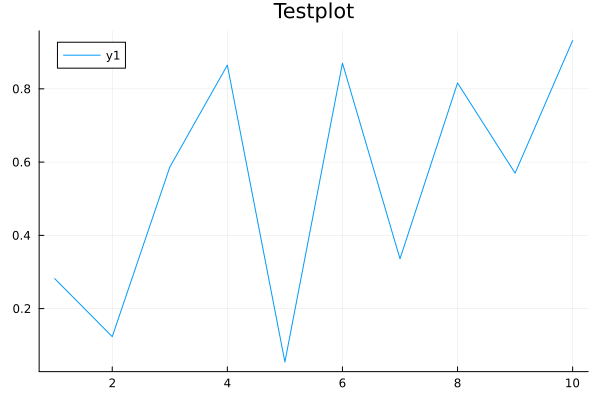

In [15]:
using Plots
plot(rand(10), title="Testplot")


   Resolving package versions...
     Project No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
    Manifest No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
    Manifest No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
    Manifest No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Project.toml`
    Manifest No packages added to or removed from `~/Desktop/PhD Classes/Macro I/chapter 1/Manifest.toml`
   Resolving package ver

IJulia installed (or already present). Restart VS Code and pick the Julia kernel.


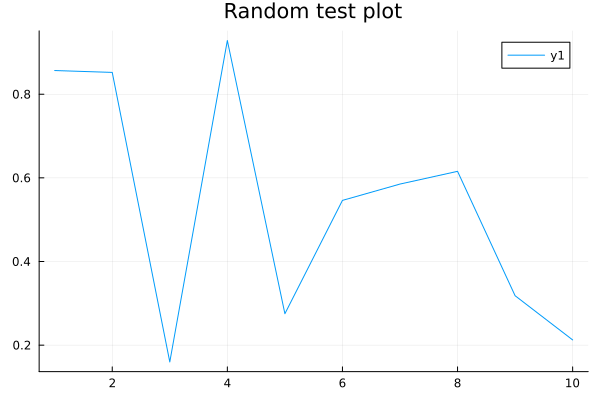

In [16]:
# Click Run (or press Shift+Enter) to execute this cell in a Julia kernel.
using Pkg
# Install basic packages that make working in notebooks smooth
Pkg.add("IJulia")
Pkg.add("Revise")
Pkg.add("Plots")
Pkg.add("NonlinearSolve")    # optional: SciML nonlinear solver package
Pkg.add("NLsolve")           # lightweight solver used in examples
# Build IJulia to register the kernel with Jupyter/VS Code
Pkg.build("IJulia")
println("IJulia installed (or already present). Restart VS Code and pick the Julia kernel.")

# Quick smoke test: create a small plot (output will appear below the cell)
using Plots
plot(rand(10), title="Random test plot")

## Labor across countries

![](graphics_chapter1/SLAG0Q02.png)

## Hours over the Life-Cycle

Does increase in life-expectancy lead to more schooling? (Ben-Porath-Model)

If (and only if) Lifetime Labor Supply increases!  
<sub>Moshe Hazan (2009): Longevity and Lifetime Labor Supply: Evidence and Implications, Econometrica vol. 77, No.6, pp. 1829-1831.</sub>

![](graphics_chapter1/SLAG0Q04.png)

### This Lecture at a glance

Comparison GER/US based on aggregate taxrate estimates by McDaniel (2007), see her data on her homepage

![taxrates_comparison](graphics_chapter1/labor_tax_plot.png)

### Preferences (separable)

We consider an individual who chooses consumption \(c\) and hours worked \(h\).

- Preferences (separable):

  $$
  U(c,h)=u(c)-v(h)
  $$

- Functional forms used here:

  $$
  u(c)=\frac{1}{1-\sigma}\;c^{1-\sigma}, \qquad \sigma>0
  $$

  $$
  v(h)=\psi\;\frac{1}{1+\dfrac{1}{\gamma}}\;h^{1+\dfrac{1}{\gamma}}, \qquad \psi>0,\; \gamma>0
  $$

- Parameters: $\sigma > 0$ is the consumption curvature (CRRA), $\gamma > 0$ controls the curvature of the disutility of labor, and $\psi > 0$ scales the disutility of work.

### Budget Constraint and Optimization

The price of consumption is normalized to one, the individual faces a wage rate of $w$, and has non-labor income equal to $I$. The individual thus solves the following problem:

$$
\max_{c,h} \, U(c,h) \quad \text{s.t.} \quad c = wh + I, \quad c \geq 0, \quad h \geq 0.
$$

Because the marginal disutility of work is equal to zero when $h = 0$, the individual will always choose $h > 0$. Substituting the budget equation into the utility function one obtains the first order condition:

$$
\psi \, h^{1/\gamma} \, (wh + I)^{-\sigma} = w. \tag{12.1}
$$

This equation has the interpretation that the individual chooses hours of work $h$ so that the marginal rate of substitution between consumption and working time is equal to the level of the real wage $w$, i.e., the price of time relative to consumption.

NLsolve example: psi=1 -> roots found (unique) = [0.9093392329975134, 0.9093392328649235, 0.9093392335123252, 0.9093392330002237, 0.9093392328648924, 0.9093392328652077]


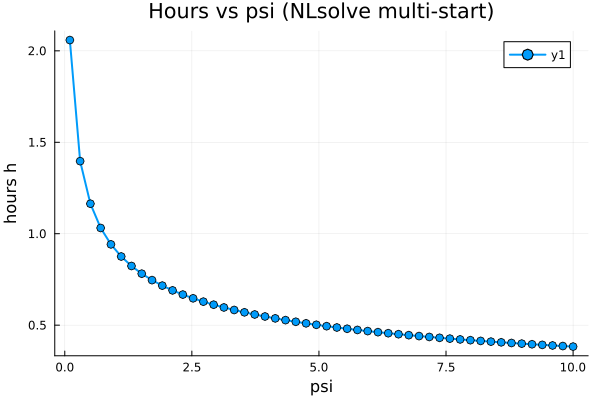

In [17]:
# NLsolve-only example: solve FOC with NLsolve; try multiple starting values to avoid missing large roots
# Minimal, self-contained: install NLsolve and Plots if missing.
try
    using NLsolve
catch e
    import Pkg; Pkg.add("NLsolve"); using NLsolve
end
try
    using Plots
catch e
    import Pkg; Pkg.add("Plots"); using Plots
end
using Printf

# Parameters (students can change)
w = 1.0
I = 0.3
gamma = 0.5
sigma = 1.0

# Residual (scalar)
# Correct residual for FOC: w*(w*h+I)^(-sigma) - psi*h^(1/gamma)
f_residual(h, psi) = h <= 0 ? w * (w*eps() + I)^(-sigma) - psi * eps()^(1/gamma) : w * (w*h + I)^(-sigma) - psi * h^(1/gamma)
#This is a Julia one-line function definition using the ternary operator: f_residual(h, psi) = condition ? expr_if_true : expr_if_false
# Single example
psi_example = 1.0
# Try multiple starting guesses to capture both small and large roots
starts = [1e-6, 0.1, 0.5, 2.0, 5.0, 10.0, 50.0]
sols = Float64[]
for s in starts
    try
        sol = nlsolve(x -> [f_residual(x[1], psi_example)], [s])
        push!(sols, sol.zero[1])
    catch e
        @warn("NLsolve start=$(s) failed: $e")
    end
end
nl_roots = unique(filter(x -> !isnan(x) && isfinite(x), sols))
@printf("NLsolve example: psi=%.3g -> roots found (unique) = %s\n", psi_example, string(nl_roots))

# Sweep psi and record solutions (brief loop) using a few initial guesses
psis = range(0.1, stop=10.0, length=50)
hs = similar(psis)
for (i, ps) in enumerate(psis)
    sols = Float64[]
    for s in (0.1, 0.5, 2.0)
        try
            sol = nlsolve(x -> [f_residual(x[1], ps)], [s])
            push!(sols, sol.zero[1])
        catch e
            # skip
        end
    end
    sols = unique(filter(x -> !isnan(x) && isfinite(x), sols))
    hs[i] = isempty(sols) ? NaN : sols[1]
end

# Plot the results
plot(psis, hs, xlabel="psi", ylabel="hours h", title="Hours vs psi (NLsolve multi-start)", lw=2, marker=:o)

Golden-section: h*=0.9093392321, F(h*)=-0.0605694274, iters=58


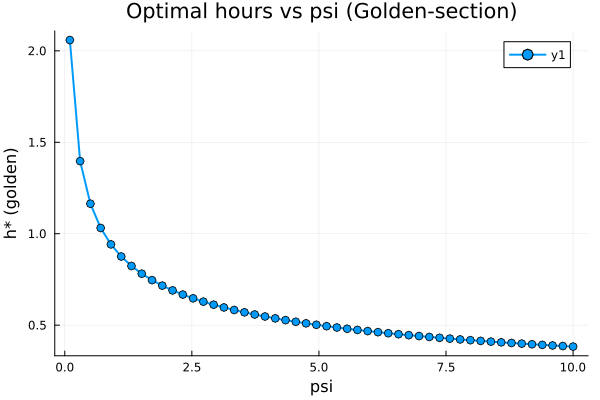

In [18]:
# Golden-section search (maximize F(h)) -- robust version
# Handles sigma==1 (log utility), uses wider bracket (0,100) by default, and warns if max sits on boundary.
try
    using Plots
catch e
    import Pkg; Pkg.add("Plots"); using Plots
end
using Printf

# Parameters (students can change)
w = 1.0; I = 0.3; sigma = 1.0; gamma = 0.5; psi = 1.0

# Utility with sigma-safe implementation
if abs(sigma - 1.0) < 1e-12
    u(c) = log(c)
    du_dc(c) = 1.0 / c
    du2_dc2(c) = -1.0 / c^2
else
    u(c) = (c^(1 - sigma) - 1) / (1 - sigma)
    du_dc(c) = c^(-sigma)
    du2_dc2(c) = -sigma * c^(-sigma - 1)
end
# disutility and its derivatives (used later in Newton)
v(h; ps=psi) = ps * h^(1 + 1/gamma) / (1 + 1/gamma)

# Objective F(h) = u(w*h + I) - v(h) with safe domain handling
function F_of_h(h; ps=psi)
    if h <= 0
        return -Inf
    end
    c = w * h + I
    return u(c) - v(h; ps=ps)
end

function golden_section_max(f, a, b; tol=1e-8, maxiter=200)
    φ = (sqrt(5) - 1)/2
    c = b - φ*(b - a)
    d = a + φ*(b - a)
    fc = f(c); fd = f(d)
    iter = 0
    while (b - a) > tol && iter < maxiter
        iter += 1
        if fc > fd
            b = d; d = c; fd = fc; c = b - φ*(b - a); fc = f(c)
        else
            a = c; c = d; fc = fd; d = a + φ*(b - a); fd = f(d)
        end
    end
    hstar = (a + b)/2
    return hstar, f(hstar), iter
end

# Example usage: use wide bracket to avoid clipping at small upper bound
a = 0.0; b = 100.0  # increased upper bound; increase further if necessary
h_gs, val_gs, iters_gs = golden_section_max(h->F_of_h(h; ps=psi), a, b; tol=1e-10)
@printf("Golden-section: h*=%.10f, F(h*)=%.10f, iters=%d\n", h_gs, val_gs, iters_gs)
if abs(h_gs - a) < 1e-12 || abs(h_gs - b) < 1e-12
    @warn("Golden-section returned boundary value (h*≈$(h_gs)); consider increasing bracket upper bound.")
end

# Sweep psi to visualize sensitivity; use large bracket to capture far optima
psis = range(0.1, stop=10.0, length=50)
hs = similar(psis)
for (i, ps) in enumerate(psis)
    hstar, _, _ = golden_section_max(h->F_of_h(h; ps=ps), 0.0, 100.0; tol=1e-8)
    hs[i] = hstar
end
plot(psis, hs, xlabel="psi", ylabel="h* (golden)", title="Optimal hours vs psi (Golden-section)", lw=2, marker=:o)

Newton maximize: h*=0.9093392329 (iters=5), F'(h*)=0.000e+00


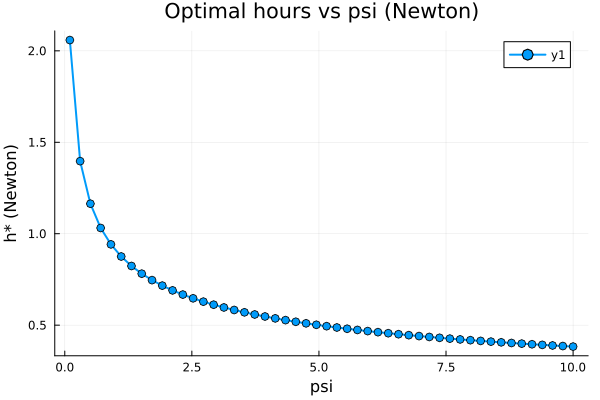

In [19]:
# Newton method for maximizing F(h) = u(w*h + I) - v(h) -- robust adjustments
using Printf
try
    using Plots
catch e
    import Pkg; Pkg.add("Plots"); using Plots
end
# Parameters
w = 1.0; I = 0.3; sigma = 1.0; gamma = 0.5; psi = 1.0
# Utility: handle sigma==1
if abs(sigma - 1.0) < 1e-12
    u(c) = log(c)
    du_dc(c) = 1.0 / c
    du2_dc2(c) = -1.0 / c^2
else
    u(c) = (c^(1 - sigma) - 1) / (1 - sigma)
    du_dc(c) = c^(-sigma)
    du2_dc2(c) = -sigma * c^(-sigma - 1)
end
v(h; ps=psi) = ps * h^(1 + 1/gamma) / (1 + 1/gamma)
dv_dh(h; ps=psi) = ps * h^(1/gamma)
dv2_dh2(h; ps=psi) = ps * (1/gamma) * h^(1/gamma - 1)

F(h; ps=psi) = h <= 0 ? -Inf : u(w*h + I) - v(h; ps=ps)
F1(h; ps=psi) = du_dc(w*h + I) * w - dv_dh(h; ps=ps)
F2(h; ps=psi) = du2_dc2(w*h + I) * w^2 - dv2_dh2(h; ps=ps)

function newton_max(h0; ps=psi, tol=1e-10, maxiter=100)
    h = h0
    for iter in 1:maxiter
        f1 = F1(h; ps=ps); f2 = F2(h; ps=ps)
        if abs(f1) < tol
            return h, iter, f1
        end
        if f2 == 0
            error("Second derivative zero; Newton fails")
        end
        h = h - f1 / f2
        if h <= 0
            h = abs(h)/2
        end
    end
    return h, maxiter, F1(h; ps=ps)
end

# Example with matching wide bracket check
a = 0.0; b = 100.0
h0 = 0.5
h_nr, it_nr, f1_nr = newton_max(h0; ps=psi, tol=1e-12)
@printf("Newton maximize: h*=%.10f (iters=%d), F'(h*)=%.3e\n", h_nr, it_nr, f1_nr)
if h_nr > b - 1e-8
    @warn("Newton returned h* outside or near upper bracket (h*=$(h_nr)). Consider increasing bracket and checking monotonicity.")
end

# Sweep psi aligned with golden-section bounds
psis = range(0.1, stop=10.0, length=50)
hs_newt = similar(psis)
for (i, ps) in enumerate(psis)
    try
        hstar, _, _ = newton_max(0.5; ps=ps, tol=1e-10)
        hs_newt[i] = hstar
    catch e
        @warn("Newton failed for psi=$(ps): $e")
        hs_newt[i] = NaN
    end
end
plot(psis, hs_newt, xlabel="psi", ylabel="h* (Newton)", title="Optimal hours vs psi (Newton)", lw=2, marker=:o)

### Elasticities of Labor Supply

Individuals differ both in the wage rate that they face and their level of non-labor income. It is of interest to ask what our model implies for how these differences will affect labor supply. Economists typically find it useful to summarize these effects as elasticities. If we write the solution to the optimal labor supply problem as $h(w, I)$, then the wage and income elasticities, denoted by $\varepsilon^M_{h,w}$ and $\varepsilon_{h,I}$, can be written as:

$$
\varepsilon^M_{h,w} = \frac{w}{h} \frac{\partial h(w, I)}{\partial w}, \quad \varepsilon_{h,I} = \frac{I}{h} \frac{\partial h(w, I)}{\partial I}.
$$

### Derivation of Elasticities

Using the implicit function theorem and equation (12.1) and carrying out some simple algebra yields the following two expressions:

$$
\varepsilon_{h,I} = -\frac{\sigma}{\frac{1}{\gamma} + \sigma(1 - s_I)} \, s_I \tag{12.2}
$$

$$
\varepsilon^M_{h,w} = \frac{1 - \sigma(1 - s_I)}{\frac{1}{\gamma} + \sigma(1 - s_I)} \tag{12.3}
$$

where $s_I = \frac{I}{w h + I}$ is the share of non-labor income in total income. This implies that knowledge of labor supply elasticities provide information about the parameters of the utility function. Given that both σ and γ are positive and sI ≤ 1, we see that the income elasticity is always negative if sI is positive. 

### Wage Elasticity: Substitution vs. Income Effect

- Next we turn to the wage elasticity. One of the most fundamental questions in labor supply is how the optimal choice of $h$ responds to an increase in $w$.

- Looking at equation (12.3), the denominator is necessarily positive, but the numerator's sign depends on $\sigma$ and $s_I$, leading to ambiguous predictions.

- An increase in $w$ has two opposing effects on optimal $h$:
  - **Substitution effect**: Higher $w$ increases the marginal reward to work, incentivizing more hours.
  - **Income effect**: Higher $w$ (with fixed hours) raises consumption, making additional consumption less valuable and incentivizing fewer hours.

- It is useful to focus on the special case where non-labor income is zero ($I = 0$). In this case:

  $$
  \varepsilon^M_{h,w} = \frac{1 - \sigma}{\frac{1}{\gamma} + \sigma}.
  $$

- In this case, the wage elasticity is:
  - Strictly positive if $\sigma < 1$ (substitution effect dominates).
  - Strictly negative if $\sigma > 1$ (income effect dominates).
  - Exactly zero if $\sigma = 1$ (effects offset perfectly).

- When $\sigma = 1$, changes in $w$ have no effect on optimal labor supply; neither effect is zero, but they offset. The magnitude of each effect increases with $\gamma$.

### Marshallian vs. Hicksian Elasticities

- The elasticity of hours with respect to the wage we calculated is the **Marshallian elasticity** (superscript $M$), the sum of substitution and income effects.

- The income effect size (holding hours fixed) is $h \cdot \frac{\partial h(w, I)}{\partial I}$, since a marginal $w$ increase adds income $h$.

- The substitution effect is the total effect minus the income effect:

  $$
  \text{substitution effect} = \frac{\partial h(w, I)}{\partial w} - h \cdot \frac{\partial h(w, I)}{\partial I}.
  $$

- In elasticity terms:

  $$
  \varepsilon^H_{h,w} = \varepsilon^M_{h,w} - (1 - s_I) \varepsilon_{h,I},
  $$

  where $\varepsilon^H_{h,w}$ is the **Hicksian elasticity**, reflecting the change in hours holding utility constant.

- Substituting expressions:

  $$
  \varepsilon^H_{h,w} = \frac{1}{\frac{1}{\gamma} + \sigma (1 - s_I)}. \tag{12.4}
  $$

- Key result: The Hicksian elasticity is always positive and larger than the Marshallian elasticity.

### Example: Hicksian vs. Marshallian in Tax Policy

- **Policy context**: Tax and transfer programs affect labor supply; useful to illustrate Hicksian vs. Marshallian elasticities.

- **Model extension**: Introduce proportional tax $\tau$ on labor income and lump-sum transfer $T$.

- **Budget constraint**:

  $$
  c = (1 - \tau) w h + I = (1 - \tau) w h + y + T, \quad c \geq 0, \quad h \geq 0,
  $$

  where $y$ is other non-labor income.

- **Effect of tax rate change**: Changing $(1 - \tau)$ is like changing $w$, so use **Marshallian elasticity** $\varepsilon^M_{h,w}$.

- **Effect of transfer change**: Changing $T$ is like changing $I$, so use **income elasticity** $\varepsilon_{h,I}$.

- **Budget-neutral policy**: If $T = \tau w h$, no income effect from $\tau$ change, so use **Hicksian elasticity** $\varepsilon^H_{h,w}$.

- **Application**: Prescott (2004) used this to study tax/transfer differences between US and Europe, finding large effects on hours. 

### Richer Versions of the Static Labor Supply Model

#### Home Production

- **Basic model limitation**: All work is market work at wage $w$, all consumption is market-purchased.

- **Reality**: Individuals do home production (e.g., cooking, cleaning, child care); classic refs: Becker (1965), Gronau (1977).

- **Extension**: Introduce $h_m$ (market work) and $h_h$ (home production).

- **Home production function**: $y_h = A h_h$, where $A$ is home productivity.

- **Total consumption**: $c = g(c_m, c_h)$, with $g$ as CES aggregator (substitutes):

  $$
  g(c_m, c_h) = \left[ \theta c_m^\eta + (1 - \theta) c_h^\eta \right]^{1/\eta}, \quad 0 < \eta < 1.
  $$

- **Disutility**: Depends on total work time $v(h_m + h_h)$.

- **Optimization**:

  $$
  \max_{h_m, h_h} \, u(g(w h_m + I, A h_h)) - v(h_m + h_h), \quad h_m \geq 0, \quad h_h \geq 0.
  $$

- **First-order conditions**:

  $$
  h_m: \quad u' g_1 w = v', \quad h_h: \quad u' g_2 A = v'.
  $$

- **Ratio condition**:

  $$
  \frac{g_2}{g_1} = \frac{w}{A}.
  $$

- **For CES and $I=0$**:

  $$
  \frac{g_2}{g_1} = \frac{1 - \theta}{\theta} \left( \frac{c_h}{c_m} \right)^{\eta - 1} = \frac{1 - \theta}{\theta} \left( \frac{A h_h}{w h_m} \right)^{\eta - 1}.
  $$

- **Implication**:

  $$
  \frac{h_h}{h_m} = \left( \frac{1 - \theta}{\theta} \right)^{1/(\eta - 1)} \left( \frac{w}{A} \right)^{\eta/(\eta - 1)}. \tag{12.6}
  $$

- **Result**: If $0 < \eta < 1$, the exponent on $w/A$ is negative, so home-to-market work ratio decreases with $w/A$ (higher market wage relative to home productivity reduces home work).

- **Key message**: Technical change in home production productivity (increasing $A$) affects market labor supply by reallocating time.

- **Application**: Greenwood, Seshadri, and Yorukoglu (2005) used a generalization to explain the rise in female labor force participation in the early 20th century via home capital goods (e.g., washing machines) increasing $A$, leading to reallocation from home to market sector per equation (12.6).

#### Household Labor Supply

- **Extension**: Labor supply from household perspective; most work in multi-member households.

- **Key insight**: Individual labor supply depends on own wage and others' wages in the household.

- **Model**: Two-member household (male $m$, female $f$); unitary model (common objective function).

- **Utility** (separable):

  $$
  U(c, h_f, h_m) = u(c) - v(h_f) - v(h_m).
  $$

- **Budget constraint**:

  $$
  c = w_f h_f + w_m h_m + I.
  $$

- **First-order conditions**:

  $$
  h_f: \quad u'(c) w_f = v'(h_f), \quad h_m: \quad u'(c) w_m = v'(h_m).
  $$

- **Ratio from FOCs**:

  $$
  \frac{v'(h_f)}{v'(h_m)} = \frac{w_f}{w_m}.
  $$

- **Implication** (with functional form):

  $$
  \frac{h_f}{h_m} = \left( \frac{w_f}{w_m} \right)^\gamma.
  $$

- **Specialization**: Higher-wage individual does more market work; $\gamma$ dictates reallocation response to relative wages.

- **With home production**: Wage differences lead to specialization in home vs. market work; reduction in gender wage gap increases female labor supply relative to male.

- **Added worker effect**: Secondary earner increases labor supply when primary earner loses income (e.g., unemployment).

#### Productivity of Leisure

- **Alternative specification**: Emphasize leisure instead of disutility of work.

- **Previous utility**: $U(c,h) = u(c) - v(h)$.

- **New utility over leisure**: $l = \bar{h} - h$ (leisure = total discretionary time - work).

  $$
  \tilde{U}(c,l) = u(c) + \tilde{v}(l), \quad \tilde{v} \text{ strictly concave}.
  $$

- **Functional form**:

  $$
  \tilde{v}(l) = \frac{1}{1 - \frac{1}{\gamma}} l^{1 - \frac{1}{\gamma}}, \quad \gamma > 0.
  $$

- **Differences from previous**:
  - Solution may not be interior (h=0 possible if I high).
  - Elasticity of utility w.r.t. work: $- \frac{h}{\tilde{v}(l)} \tilde{v}'(l)$, approaches infinity as $h \to \bar{h}$ (l → 0).

- **Extension: Productivity of leisure** (Aguiar, Bils, Hurst, Charles 2021).

- **Multiple leisure activities**: J activities, $l_j$ time to activity j.

- **Leisure utility**:

  $$
  \tilde{v} \left( \sum_j (A_j l_j)^{1-\delta} \right)^{\frac{1}{1-\delta}},
  $$

  where $A_j$ is productivity of leisure in activity j.

- **Increases in $A_j$**: Act like increase in preference parameter (e.g., ψ in original model).

- **Deeper analysis**: Compare trend changes in leisure allocation vs. changes during economic downturns to assess if trends reflect changes in $A_j$.

- **Key finding**: Large increase in productivity of leisure for computer/video games, leading to more leisure time devoted by young males.

### Dynamic Labor Supply: A First Look

- **Static vs. dynamic**: Static emphasizes wage and income elasticities; dynamic introduces another key elasticity for labor supply responses.

- **Two-period model**:

- **Preferences**:

  $$
  U(c_1, c_2, h_1, h_2) = \sum_{t=1}^2 \beta^{t-1} \left[ \frac{1}{1-\sigma} c_t^{1-\sigma} - \psi \frac{1}{1 + \frac{1}{\gamma}} h_t^{1 + \frac{1}{\gamma}} \right],
  $$

  with $\beta \in (0,1)$ discount factor.

- **Wages**: $w_1$ in period 1, $w_2$ in period 2.

- **Lifetime budget** (with borrowing/saving at rate $r$):

  $$
  c_1 + \frac{c_2}{1+r} = w_1 h_1 + \frac{w_2 h_2}{1+r} + I.
  $$

- **Special case**: If $\beta = \frac{1}{1+r}$ and $w_1 = w_2$, optimal $h$ same in both periods (like static).

- **Interest**: Wage differences across periods.

- **First-order conditions** (with $\beta = \frac{1}{1+r}$, $\lambda$ Lagrange multiplier):

  $$
  c_1: \quad c_1^{-\sigma} = \lambda, \quad c_2: \quad c_2^{-\sigma} = \lambda,
  $$

  $$
  h_1: \quad \psi h_1^{1/\gamma} = \lambda w_1, \quad h_2: \quad \psi h_2^{1/\gamma} = \lambda w_2.
  $$

- **Ratio**:

  $$
  \frac{h_1}{h_2^{1/\gamma}} = \frac{w_1}{w_2}, \quad \text{or} \quad \log h_1 - \log h_2 = \gamma (\log w_1 - \log w_2).
  $$

- **Implication**: Hours and wages positively correlated intertemporally; work more when wages higher (due to transferability of purchasing power).

- **Intertemporal elasticity of substitution for labor supply**: $\gamma$ (also Frisch elasticity, holding marginal utility of consumption (tightly linked to life-time income) fixed).

- **Importance**: Key for understanding labor supply in business cycles; used in estimating Frisch elasticity with panel data.

### Dynamic Models of Labor Supply: Theory and Estimation

- **Model**: Fully dynamic stochastic life-cycle model.

- **Generalization**: Derivations for three labor supply elasticities (Marshallian, Hicksian, Frisch) from Section 3.

- **Challenge**: Non-labor income endogenous (includes savings, a choice variable).

- **Solution**: Two-stage budgeting approach (Blundell and MaCurdy 1999; Keane 2011).

- **First stage**: Household allocates lifetime resources intertemporally by choosing savings in each period.

- **Second stage**: Savings chosen → non-labor income given → household chooses hours worked (analogous to static model).

- **Individual setup**: Lives T periods (T=∞ special case), discount β > 0; utility from c_{it}, disutility from h_{it}; time endowment =1.

- **Wages**: w_{it} stochastic.

- **Assets**: Trades risk-free asset a_{it} with return R=1+r, borrowing limit \bar{a}.

- **Government**: Proportional tax τ on labor income, lump-sum transfer T.

- **Optimization**:

  $$
  \max_{\{c_{it}, h_{it}\}_{t=0}^T} \, E_0 \sum_{t=0}^T \beta^t u(c_{it}, h_{it}) \tag{12.7}
  $$

  s.t.

  $$
  c_{it} + a_{i,t+1} = R a_{it} + (1 - \tau) w_{it} h_{it} + T, \quad a_{i,t+1} \geq -\bar{a}, \quad c_{it} \geq 0, \quad 0 \leq h_{it} \leq 1.
  $$

- **No-Ponzi**: For T=∞, \lim_{T \to \infty} a_{i,T} / R^T \geq 0.

- **Preferences** (special case):

  $$
  u(c_{it}, h_{it}) = \frac{c_{it}^{1-\sigma}}{1-\sigma} - \psi \frac{1}{1 + \frac{1}{\gamma}} h_{it}^{1 + \frac{1}{\gamma}} \tag{12.8}
  $$

  with $\sigma \geq 0$, $\gamma > 0$, $\psi > 0$.

### Derivations of labor supply elasticities

- Define non-labor income net of saving: $$ I_{it} = r a_{it} + T - (a_{i,t+1} - a_{it}) $$
- Rewrite the time $t$ budget constraint: $$ c_{it} = (1 - \tau) w_{it} h_{it} + I_{it} $$
- Normalize time endowment to 1, rewrite budget as: $$ c_{it} + (1 - \tau) w_{it} (1 - h_{it}) = Y_{it} $$
- Full income $Y_{it}$ is the maximum possible income at time $t$ taking $a_{i,t+1}$ as given: $$ Y_{it} = (1 - \tau) w_{it} + R a_{it} + T - a_{i,t+1} $$
- Two-state budgeting approach splits the dynamic optimization problem into two steps:
  - First: Allocate lifetime full income period by period, choosing sequence $\{a_{i,t+1}\}_{t=0}^T$ based on the Euler equation (intertemporal optimality condition).
  - Second: Given $a_{i,t+1}$, choose $(c_{it}, h_{it})$ at every $t$ based on intratemporal first-order condition and budget constraint.
- Focus on a generic time $t$, taking $a_{i,t+1}$ as given.

#### Marshallian elasticity

- Derivation of the Marshallian elasticity $\varepsilon^M_{h,w}$, the total (uncompensated) elasticity of hours worked $h_{it}$ to wage $w_{it}$, keeping non-labor income $I_{it}$ fixed.
- Differentiate budget constraint (12.10) w.r.t. $w_{it}$, $c_{it}$, $h_{it}$: $$ \frac{d \log c_{it}}{d \log w_{it}} = (1 - s^I_{it}) + (1 - s^I_{it}) \frac{d \log h_{it}}{d \log w_{it}} $$ where $s^I_{it} = I_{it}/c_{it} < 1$ is the non-labor income share.
- Intratemporal first-order condition: $$ c^{-\sigma}_{it} w_{it} (1 - \tau) = \psi h^{1/\gamma}_{it} $$
- Differentiate (12.13) w.r.t. $w_{it}$, $c_{it}$, $h_{it}$: $$ \frac{1}{\sigma} \frac{d \log c_{it}}{d \log w_{it}} + \frac{1}{\gamma} \frac{d \log h_{it}}{d \log w_{it}} = 1 $$
- Combine (12.12) and (12.14) for the Marshallian elasticity: $$ \varepsilon^M_{h,w} \equiv \frac{d \log h_{it}}{d \log w_{it}} = \frac{1 - \frac{1}{\sigma} (1 - s^I_{it})}{\frac{1}{\gamma} + \frac{1}{\sigma} (1 - s^I_{it})} $$
- Same as equation (12.3) in the static model, modulo the definition of $s^I_{it}$.
- $\varepsilon^M_{h,w}$ can be positive or negative, depending on whether the substitution effect dominates the income effect.

#### Hicksian elasticity

- Hicksian or "compensated" elasticity measures response of hours to wage change compensated by opposite change in non-labor income, capturing only the substitution effect.
- Optimal hours $h_{it}(w_{it}, I_{it})$ from FOC (12.13).
- Differentiate: $$ dh_{it} = \frac{\partial h_{it}}{\partial w_{it}} dw_{it} + \frac{\partial h_{it}}{\partial I_{it}} dI_{it} $$
- Rearrange: $$ \frac{dh_{it}}{dw_{it}} \frac{w_{it}}{h_{it}} = \frac{\partial h_{it}}{\partial w_{it}} \frac{w_{it}}{h_{it}} + \frac{\partial h_{it}}{\partial I_{it}} \frac{I_{it}}{h_{it}} \cdot \frac{dI_{it}}{dw_{it}} \frac{w_{it}}{I_{it}} $$
- LHS is Marshallian elasticity; first RHS term is Hicksian if compensation $dI_{it}/dw_{it} = (1 - \tau) h_{it}$.
- Slutsky equation: $$ \varepsilon^H_{h,w} = \varepsilon^M_{h,w} - \varepsilon_{h,I} \frac{1 - s^I_{it}}{s^I_{it}} $$
- Elasticity of hours to non-labor income: $$ \varepsilon_{h,I} \equiv \frac{d \log h_{it}}{d \log I_{it}} = -\frac{1}{\sigma s^I_{it}} \frac{1}{\frac{1}{\gamma} + \frac{1}{\sigma} (1 - s^I_{it})} $$
- Hicksian elasticity: $$ \varepsilon^H_{h,w} = \frac{1}{\frac{1}{\gamma} + \frac{1}{\sigma} (1 - s^I_{it})} $$
- Hicksian is always positive; $\varepsilon^H_{h,w} \geq \varepsilon^M_{h,w}$, equality when $\sigma \to \infty$.
- Same as static model; useful for permanent wage/tax changes without shifting saving patterns.
- For temporary changes, need Frisch elasticity.

#### Example on Frisch

- GHH utility function: $$ U(c_{it}, h_{it}) = c_{it} - \psi \left( \frac{h_{it}^{1+\gamma}}{1+\gamma} \right)^{\frac{1-\sigma}{-1}} \frac{1}{1-\sigma} $$
- Applying (12.21): $\varepsilon^F_{h,w} = \gamma$
- Income effect is zero, so $\varepsilon^M_{h,w} = \varepsilon^H_{h,w} = \varepsilon^F_{h,w} = \gamma$
- Not all utilities imply constant Frisch elasticity; for some, Frisch of leisure is constant, but of hours depends on $h_{it}$.
- First specification: $U(c_{it}, h_{it}) = \frac{c_{it}^{1-\psi} (1 - h_{it})^{\psi}}{1-\sigma}$
- Second: $U(c_{it}, h_{it}) = \frac{c_{it}^{1-\sigma}}{1-\sigma} + \psi \frac{(1 - h_{it})^{1-\gamma}}{1-\gamma}$
- For first: $\varepsilon^F_{h,w} = \frac{1 - h_{it}}{h_{it}} \frac{1 - (1-\psi)(1-\sigma)}{\sigma}$
- For second: $\varepsilon^F_{h,w} = \frac{1 - h_{it}}{h_{it}} \frac{1}{\gamma}$
- Individuals working more hours are less responsive to temporary wage changes.
- (12.21) assumes intratemporal optimization; intertemporal factors matter (e.g., constraints affect marginal utility of wealth).
- Under separable utility, no constraints/uncertainty, Euler equation: $c_{it}^{-\sigma} = \beta R c_{i,t+1}^{-\sigma}$
- Substitute FOC: $\frac{d \log h_{i,t+1}}{h_{it}} / \frac{d \log w_{i,t+1}}{w_{it}} = \gamma$
- Frisch elasticity dictates response of relative hours to relative wages across periods; larger $\gamma$ means more shift to temporary changes.
- Derivation requires no binding constraints and no uncertainty/precautionary motives.
- Next section discusses complications for estimating $\gamma$.

### Estimation of Frisch elasticity from micro data

- In separable utility specification (12.8), key elasticity parameters are $\sigma$ and $\gamma$.
- $\sigma$ governs intertemporal elasticity of substitution for consumption and risk aversion (e.g., sensitivity of consumption growth to interest rate, portfolio allocation between risky/safe assets, equity premium for given consumption volatility).
- Estimation of $\sigma$ has been in consumption and asset pricing literatures.
- Focus on $\gamma$: brief overview of empirical challenges in estimating Frisch elasticity from micro data, and evolution of macro-labor literature to address them.
- Assumptions: households solve (12.7), have rational expectations, know stochastic process of $w_{it}$, utility takes separable form (12.8), parameter to estimate is $\gamma$.
- Two complementary approaches: structural and experimental.

#### Structural approach

- Taking logs of optimality conditions (12.18) and (12.19), with $const_i$ for individual-specific constants: $$ \log c_{it} = -\frac{1}{\sigma} \log \lambda_{it} + const_i $$
- $$ \log h_{it} = const_i + \gamma \log w_{it} + \gamma \log \lambda_{it} $$
- Minimum requirement: longitudinal micro data on individual hourly wages and hours worked.
- Key challenge: marginal utility $\lambda_{it}$ is unobservable.
- Naively estimating (12.25) by OLS with individual fixed effects problematic because $\lambda_{it}$ in residual correlated with persistent wage component affecting wealth or consumption; $cov(\log w_{it}, \log \lambda_{it}) < 0$, inducing downward bias in $\hat{\gamma}$.
- Same issue in first differences.
- Empirical literature tackles this in three ways: (i) instrumental variables, (ii) data on expected wage growth, (iii) data on consumption expenditures.

##### Instrumental variables

- Address OLS bias with instrumental variables.
- Express (12.25) in first differences: $$ \Delta \log h_{it} = \gamma \Delta \log w_{it} + \gamma \Delta \log \lambda_{it} $$
- Optimal saving yields Euler equation in logs: $$ \log (\lambda_{it} - \phi_{it}) = const_i + \log E_t [\lambda_{i,t+1}] $$
- Assuming $\lambda_{it}$ conditionally log-normal: $$ \log E_t [\lambda_{i,t+1}] = E_t [\log \lambda_{i,t+1}] + \frac{1}{2} Var_t (\log \lambda_{i,t+1}) $$
- Substitute: $$ \log (\lambda_{it} - \phi_{it}) = const_i + \log \lambda_{i,t+1} - \xi_{i,t+1} + \frac{1}{2} Var_t (\xi_{i,t+1}) $$
- First-order approximation around $\phi^* = 0$, and $ Var_t (\log \lambda_{i,t+1}) = Var_t (\xi_{i,t+1})$: $$ \log \lambda_{it} - \frac{\phi_{it}}{\lambda_{it}} = const_i + \log \lambda_{i,t+1} - \xi_{i,t+1} + \frac{1}{2} Var_{t-1} (\xi_{it}) $$
- Substitute into (12.26): $$ \Delta \log h_{it} = \gamma \Delta \log w_{it} + \gamma \xi_{it} - \frac{\phi_{i,t-1}}{\lambda_{i,t-1}} - \frac{1}{2} Var_{t-1} (\xi_{it}) $$
- Expect $\xi_{it}$ negatively correlated with $\Delta \log w_{it}$: positive wage news → unexpected consumption growth → decline in $\xi_{it}$.
- MaCurdy (1981a) abstracts from constraints and uncertainty ($\phi_{i,t-1} = 0$, $Var = 0$), uses lagged wage growth $\Delta \log w_{i,t-1}$ as instrument for correlation between $\xi_{it}$ and $\Delta \log w_{it}$.
- Ineffective strategy: (i) wages measured as earnings/hours, hours measured with error → downward bias in $\gamma$ estimate; (ii) if wages persistent, autocorrelation of wage growth with past is small (zero for random walk).

##### Wage growth expectations

- Decompose wage growth: $$ \Delta \log w_{it} = E_{t-1} [\Delta \log w_{it}] + \varepsilon_{it} $$ where $\varepsilon_{it}$ orthogonal to predicted wage growth under rational expectations.
- Substitute into (12.26): $$ \Delta \log h_{it} = \gamma E_{t-1} [\Delta \log w_{it}] + \gamma (\varepsilon_{it} + \Delta \log \lambda_{it}) $$
- Under permanent-income hypothesis (no constraints), consumption growth ($\Delta \log \lambda_{it}$) only affected by news $\varepsilon_{it}$, not past information.
- With external measure of expected wage growth, estimate $\gamma$ consistently.
- Pistaferri (2003) estimates (12.31) using Italian survey data with subjective earnings expectations, obtains $\gamma = 0.7$.
- Domeij and Floden (2006b): both wage expectations and IV approaches fail if binding borrowing constraints.
- For (12.31): steep predictable wage growth → more likely constrained (want to consume more from future income) → negative correlation between $E_{t-1} [\Delta \log w_{it}]$ and $\Delta \log \lambda_{it}$.
- Same bias in (12.29) using $\Delta \log w_{i,t-1}$ as IV.
- Another bias: constrained agents increase labor supply in response to falling wages to avoid drastic consumption cuts → downward bias in Frisch elasticity.
- Low (2005): even without constraints, uninsurable income risk → precautionary saving motive → work more to increase saving (precautionary labor supply) → if strong when wage growth high, downward omitted variable bias (e.g., young workers with steep wage growth and low wealth).
- Consumption data: exploit (12.24) to use $c_{it}$ instead of $\lambda_{it}$.
- Combine (12.24) and (12.26) in first differences: $$ \Delta \log h_{it} = \gamma \Delta \log w_{it} - \gamma \sigma \Delta \log c_{it} $$
- Altonji (1986b) uses PSID data on earnings, hours, expenditures on food/clothing/shelter.
- Advantage: based on envelope condition, immune to binding constraints.
- Limitations: consumption measured with error, weak correlation with true marginal utility; food proxy represents small budget share.

##### Experimental and quasi-experimental evidence

- In light of challenges in structural approaches, literature explores RCTs or quasi-exogenous variation to estimate Frisch elasticity.
- Fehr and Goette (2007): RCT at bicycle messenger service in Zurich; messengers paid on commission; exogenous transitory 25% increase in commission rate for random subgroup for four weeks; negligible impact on lifetime wealth; compare treated vs control group; estimate intertemporal elasticity of substitution >1.
- Bianchi, Gudmundsson, and Zoega (2001): quasi-exogenous variation from macro data; tax-reform in Iceland making 1987 free of labor income taxes; strong incentive for intertemporal substitution of work, minimal income effect (only one year, small change in lifetime resources); natural experiment for Frisch elasticity; estimate average Frisch elasticity around 0.4.

#### Optimization frictions

- Optimization frictions: costs to update decisions (physical adjustment, information acquisition, behavioral biases like status-quo); challenge for estimating labor supply elasticities from microdata (Chetty 2012b).
- Illustrate with static model using GHH preferences to abstract from income effects.
- Static optimization: $$ U(c^*, h^*) = \max_{c,h} \log c - \psi \frac{h^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}} - \Delta I\{h \neq h^*\} $$ s.t. $c = w h$
- Under these preferences, Frisch, Marshallian, and Hicksian elasticities all equal to $\gamma$.
- Fixed re-optimization cost $\Delta > 0$ when $h \neq h^*$.
- Optimal choices: $$ h^* = \left( \frac{w}{\psi} \right)^\gamma $$ $$ c^* = w h^* $$
- Utility at optimum: $U(c^*, h^*) = -\log(1+\gamma) - \gamma \log \psi + (1+\gamma) \log w$
- Wage increase from $w$ to $w(1+\varepsilon)$, ignoring costs.
- Utility gain decomposition: $$ U(c^*_\varepsilon, h^*_\varepsilon) - U(c^*, h^*) = [U(c^*_\varepsilon, h^*) - U(c^*, h^*)] + [U(c^*_\varepsilon, h^*_\varepsilon) - U(c^*_\varepsilon, h^*)] $$
- First term: $\log(1 + \varepsilon(1+\gamma))$
- Second term: $(1+\gamma) \log(1+\varepsilon) - \log(1 + \varepsilon(1+\gamma))$
- Second-order approximation: $$ U(c^*_\varepsilon, h^*_\varepsilon) - U(c^*_\varepsilon, h^*) \approx \frac{1}{2} \gamma (1+\gamma) \varepsilon^2 $$
- With friction $\Delta$, change hours only if $\varepsilon > \varepsilon_{\min} = \sqrt{\frac{2\Delta}{\gamma (1+\gamma)}}$
- Higher $\gamma$, lower threshold.
- Downward bias in estimating $\gamma$ for small wage changes; responds with elasticity $\gamma$ for large changes.
- Observe changes in $\log h^* > \sqrt{\frac{2\Delta \gamma}{1+\gamma}}$
- Frictions cause deviations from optimal; microeconometric studies uninformative unless wage changes large enough to overcome frictions.
- General insight applicable beyond labor supply.

### Labor supply and balanced growth

- Developed economies grow at constant rate; balanced growth: consumption, investment, output grow at same rate.
- Hours cannot grow constantly (hit time endowment), so must be constant for balanced growth.
- Figure 12.1: US hours per person relatively stable over time.
- King, Plosser, Rebelo (1988b): long-run labor supply imposes restrictions on preferences.
- Social planner neoclassical growth model with Cobb-Douglas production (capital share α): $$ \max_{\{C_t, H_t\}_{t=0}^\infty} \sum_{t=0}^\infty \beta^t U(C_t, 1 - H_t) $$ s.t. $$ C_t + K_{t+1} = Z_t^{1-\alpha} K_t^\alpha H_t^{1-\alpha} + (1 - \delta) K_t $$ $K_0$ given.
- $Z_t$ labor-augmenting technological change, grows at constant rate $g$: $Z_{t+1} = Z_t (1 + g)$.
- Balanced growth path: consumption, investment, capital, output grow at rate $g$; hours constant.
- Period utility consistent with balanced growth iff $$ U(C, 1 - H) = \begin{cases} \frac{C^{1-\sigma} - 1}{1-\sigma} + v(1 - H) & \text{if } \sigma \neq 1 \\ \log(C) + v(1 - H) & \text{if } \sigma = 1 \end{cases} $$
- In static setting with labor income only, higher wage has no effect on desired hours (income and substitution effects cancel).
- Allows hours to remain constant with positive productivity growth (implying real wage growth).
- Figure 12.1: many countries hours slowly diminished post-war; US stability is exception rather than representative.
- Next section: factors accounting for variation in hours across countries and over time.

### Labor supply across countries and over time

- Two classic issues: (i) large differences in hours worked per capita across countries (Table 12.1), (ii) wide variation over time at business cycle frequency (Figure 12.4).
- Section illustrates use of representative household models to shed light on labor supply role in these contexts.
- Key message: representative agent model with simple preferences $$ U(c_t, h_t) = \log(c_t) - \psi \frac{1 + \frac{1}{\gamma}}{1 + \frac{1}{\gamma}} h_t^{1 + \frac{1}{\gamma}} $$ accounts for important part of variation in aggregate hours, both across countries and over time.
- Labor supply relevant for understanding aggregate labor market outcomes.
- Parsimonious model quantitatively important but does not capture all data aspects; some variation reflects factors other than labor supply.

#### 12.6.1 Labor supply and taxation across countries

- Factors explaining cross-country differentials in hours: taxes and transfers influence work incentives.
- Prescott (2004): households work less in high tax countries; simple framework to assess quantitatively.
- Infinitely-lived representative household with taxes $\tau_c$ on consumption, $\tau_h$ on labor income, lump-sum transfers $T_t$: $$ \max_{\{C_t, H_t\}_{t=0}^\infty} \sum_{t=0}^\infty \beta^t \left[ \log C_t - \psi \frac{1 + \frac{1}{\gamma}}{1 + \frac{1}{\gamma}} H_t^{1 + \frac{1}{\gamma}} \right] $$ s.t. $$ (1 + \tau_c) C_t + K_{t+1} = (1 - \tau_h) w_t H_t + r_t K_t + (1 - \delta) K_t + T_t $$
- Firm: Cobb-Douglas; resource constraint: $C_t + G_t + K_{t+1} - (1 - \delta) K_t = Y_t = Z_t^{1-\alpha} K_t^\alpha H_t^{1-\alpha}$
- Government: tax revenue finances $G_t$ and $T_t$, balanced budget.
- Preferences assume no value for $G_t$.
- Prescott: $Z_t$ grows at constant rate, $G_t = g Y_t$, focus on balanced growth path hours.
- From FOC for intratemporal allocation: $$ H^* = \left( \frac{(1 - \tau) (1 - \alpha)}{\chi \psi \gamma^{1/\gamma}} \right)^\gamma $$ where $\tau = \tau_h + \frac{\tau_c}{1 + \tau_c}$, $\chi = C_t / Y_t$ constant.
- Assumes $\alpha$, $\psi$, $\gamma$ common; differences due to $\tau$ and $\chi$.
- Example: US vs Italy mid-1990s: hours 25.9 vs 16.5/week, ratio 1.57.
- $\tau$ 0.40 US, 0.64 Italy; $\chi$ 0.81 US, 0.69 Italy.
- With $\gamma = 1$, predicted ratio 1.42 vs 1.57 data.
- Theory accounts for much of cross-country differences.
- Elasticity for permanent tax changes: Marshallian if revenue not rebated, Hicksian if rebated.
- Prescott sets $\sigma = 1$ for balanced growth; $\gamma$ determines both elasticities.
- Bick et al. (2018): broader sample, negative relationship between hours and GDP per capita.
- Alternative explanation: income effects > substitution effects.
- Standard spec: $U(c_t, h_t) = \log c_t - \psi \frac{1 + \frac{1}{\gamma}}{1 + \frac{1}{\gamma}} h_t^{1 + \frac{1}{\gamma}}$
- Modification 1 (subsistence $\bar{c}$): $U(c_t, h_t) = \log(c_t - \bar{c}) - \psi \frac{1 + \frac{1}{\gamma}}{1 + \frac{1}{\gamma}} h_t^{1 + \frac{1}{\gamma}}$; income > substitution at low $c$, offsetting at high $c$.
- Modification 2 ($\sigma > 1$): $U(c_t, h_t) = \frac{1}{1 - \sigma} c_t^{1 - \sigma} - \psi \frac{1 + \frac{1}{\gamma}}{1 + \frac{1}{\gamma}} h_t^{1 + \frac{1}{\gamma}}$; income always > substitution.
- Boppart and Krusell (2020): (2) gives balanced growth with constant rate decrease in hours.
- Ohanian et al. (2008): tax rate changes account for post-1960 trend in OECD hours.
- Open issue: whether income > substitution effects, and if diminishes with consumption.

### Labor supply and business cycle fluctuations

- Frisch elasticity relevant for role of labor supply in accounting for large fluctuations in hours over business cycle.
- Figure 12.4: hours volatile and pro-cyclical.
- Return to household problem (12.37), allow stochastic $Z_t$ driving fluctuations.
- (12.38) holds, but $\chi_t$ varies.
- In logs: $$ \log H_t =const - \frac{\gamma}{1 + \gamma} \log \left( \frac{C_t}{Y_t} \right) $$
- Expectations captured by current $\chi_t$.
- Productivity above trend (boom), expected to revert (AR1), permanent income: $C$ increases less than $Y$, $\chi$ low, $H$ above steady-state.
- Sensitivity mediated by $\gamma$.
- If $\gamma$ infinite (indivisible labor, Rogerson 1988, Hansen 1985), $\gamma/(1+\gamma)=1$, $\log H$ moves 1:1 with $\log(C/Y)$.
- $\gamma=1$ gives half the response.
- Broad agreement $\gamma$ central to business cycle behavior of aggregate labor supply.
- Without capital, closed economy, $C=Y$ always, hours invariant to productivity changes, including temporary.
- Procyclical hours salient fact; models need capital/savings to match.
- (12.39) poor approximation to data: hours decrease more than predicted by $C/Y$ in recessions.
- Missing term: labor wedge, acts like countercyclical labor income tax.
- Chapter 14: interpretations of labor wedge.
- Most plausible: abstracts from labor market frictions, bilateral monopoly, unemployment.
- Chapter 20: these topics.

### Dynamic returns to labor supply

- Previous analyses assume exogenous wage evolution; macro tradition: wages increase with experience/human capital.
- Imai and Keane (2004): incorporating human capital has implications for labor supply elasticities measurement.
- Abstract from borrowing constraints in (12.7), add dynamic returns to work.
- Problem: $$ \max_{\{c_{it}, h_{it}\}_{t=0}^T} E \sum_{t=0}^T \beta^t \left[ \frac{c_{it}^{1-\sigma}}{1-\sigma} - \psi \frac{h_{it}^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}} \right] $$
- s.t. $c_{it} + a_{i,t+1} = R a_{it} + (1-\tau) w_{it} h_{it} + T$
- $w_{it} = \left(1 + \kappa \sum_{j=0}^{t-1} h_{ij}\right) w_{i0}$
- Return to work: current wage + expected PV of increased future earnings.
- FOC w.r.t. $h_{it}$: $$ \psi h_{it}^{1/\gamma} = \lambda_{it} (1-\tau) \left[ w_{it} + \kappa w_{i0} \sum_{j=1}^{T-t} R^{-j} E_t [h_{i,t+j}] \right] $$
- Human capital term creates wedge between current wage and return to work.
- $\gamma$ no longer Frisch elasticity; $\gamma$ is elasticity to total return, Frisch to transitory $w_{it}$ keeping $\lambda$ constant.
- Figure 12.6: life cycle paths of hours, wages, human capital term, return to work.
![Life cycle paths](graphics_chapter1/human_capital.png)
- Human capital high early, declines with age.
- Naively estimating $\gamma$ from current $w$ and $h$ underestimates true $\gamma$ because hours flat while wages steep early.
- $\gamma$ from joint dynamics of hours and return to work (flatter path).
- Frisch elasticity smaller when human capital term large; Imai and Keane estimate Frisch 0.4 to 2.0 with age.
- Alters ranking of elasticities: Frisch > Hicksian > Marshallian no longer necessarily true.
- Transitory vs permanent tax: permanent has stronger income and substitution effects; substitution can dominate under some params.
- Human capital dampens responses to transitory changes (strong for young), magnifies permanent changes.

### Labor supply along the intensive and extensive margins

- Section 12.2: variation in aggregate hours from extensive (number of people employed) and intensive (hours per person employed) margins.
- Previous models: all variation along intensive margin, no consideration of extensive margin.
- Large body of work: explicitly modeling both margins important for understanding labor supply responses.
- Section: study models incorporating intensive and extensive margins, illustrate implications.
- Key message: labor supply elasticities estimated using individual panel data may not be informative about aggregate labor supply elasticities, i.e., how aggregate hours respond to changes in the average real wage.

#### A static model with indivisible labor

- Study static model with adjustment only along extensive margin, contrast with intensive margin model.
- Intensive margin economy: general equilibrium version of benchmark static model.
- Unit mass identical individuals, preferences: $$ U(c, h) = u(c) - \psi v(h) $$ with $$ u(c) = \frac{c^{1-\sigma}}{1-\sigma}, \quad v(h) = \frac{h^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}} $$
- Production: $$ Y = A H $$
- Normalize discretionary time to 1, $h \in [0,1]$
- Extensive margin (indivisible labor): individuals choose $h=0$ or $h=\bar{h} \in (0,1)$
- Social planner in divisible labor: $$ \max U(c, h) \quad \text{s.t.} \quad c = A h, \quad 0 \leq h \leq 1 $$ all individuals same allocation.
- In indivisible labor: fraction $e$ work $\bar{h}$, output $A e \bar{h}$, consumption spread equally.
- Equivalent to random allocation: work with probability $e$, receive $c$.
- Problem: $$ \max_{e,c} e U(c, \bar{h}) + (1-e) U(c, 0) \quad \text{s.t.} \quad c = A \bar{h} e $$
- Objective: $$ u(c) - e [v(\bar{h}) - v(0)] - v(0) = u(c) - \tilde{\psi} e $$ where $\tilde{\psi} = v(\bar{h}) - v(0)$
- Divisible labor objective: $$ u(c) - \psi \frac{h^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}} $$
- Indivisible labor has infinite aggregate Frisch elasticity, divisible has $\gamma$.
- Disconnect between individual and aggregate elasticities.
- In indivisible: individual labor supply doesn't vary smoothly, but aggregate does via employment fraction $e$.
- Takeaways: disconnect between aggregate and individual labor supply; explains large aggregate Frisch elasticity independent of individual elasticity.

##### Decentralizing the social planner’s allocations

- Discussion focused on social planner allocations.
- Divisible labor: straightforward to implement as competitive equilibrium.
- Indivisible labor: social planner uses randomization; how to implement as competitive equilibrium?
- Hansen (1985), Rogerson (1988): allow individuals to sell employment probabilities.
- Wage $w$ per unit work; offering $\bar{h}$ hours with probability $e$ gives earnings $e \bar{h} w$.
- Firm demands total hours; law of large numbers makes aggregate supply deterministic.
- Ljungqvist and Sargent (2006): implement with more compelling market structure in multi-period economy.
- Continuous time from 0 to $T$; each instant like static indivisible economy, constant parameters.
- Lifetime utility: integral of utility without discounting.
- Optimal: work with probability $e^*$ at each instant, receive $c^*$.
- Insight: working with probability $e$ each instant ≡ deterministically working fraction $e$ of time.
- With borrowing/saving, zero interest rate, smooth consumption $e \bar{h} w$ each period.
- No discounting → equilibrium interest rate zero.
- Normalize consumption price to 1, wage constant $A$.
- Individual problem: $$ \max \int_0^T U(c(t), e(t) \bar{h}) \, dt \quad \text{s.t.} \quad \int_0^T c(t) \, dt = \int_0^T e(t) \bar{h} A \, dt, \quad e(t) \in \{0,1\}, \quad c(t) \geq 0 $$
- Solution: choose $e(t)$ such that $\int e(t) \, dt = e^*$, $c(t) = c^*$, indifferent about timing.
- All individuals same; fraction $e^*$ work each period, implements social planner allocation without random labor markets.

##### Allowing for heterogeneity

- Indivisible labor with identical individuals → infinite aggregate Frisch elasticity if interior employment.
- Hinges on identical individuals; same reservation wage for all.
- Small wage change around reservation moves everyone from work to not work and vice versa.
- Heterogeneity in reservation wages: small change affects only small group.
- Formalize: static economy, ex ante identical, idiosyncratic shocks to ψ, iid from cdf F(ψ), density f(ψ).
- Social planner maximizes expected utility.
- Allocations: e(ψ) employment prob, c(ψ) consumption for ψ.
- Same c for all; efficient to have fraction e with lowest ψ work with prob 1, others 0.
- Reservation: $$\psi^* \text{ with } F(\psi^*) = e$$
- Total disutility: $$\tilde{v}(e) = \int_0^{\psi^*(e)} \psi f(\psi) \, d\psi$$
- Social planner: $$\max \, u(c) - \tilde{v}(e) \quad \text{s.t.} \quad c = A e \bar{h}$$
- ṽ not linear; depends on f.
- Aggregate Frisch depends on local properties of ṽ, hence f.
- Generalizes to dynamic with iid ψ each instant.
- Implementable in competitive equilibrium with complete markets.
- Similar for productivity heterogeneity.
- Quantitative: Chang and Kim (2006).
- Two-member households, indivisible labor, idiosyncratic productivity shocks, incomplete markets.
- Preferences: $$\sum \beta^t \left[2 \log\left(\frac{c_t}{2}\right) - \psi_m \frac{h_{mt}^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}} - \psi_f \frac{h_{ft}^{1+\frac{1}{\gamma}}}{1+\frac{1}{\gamma}}\right]$$
- Productivity: $$\log z_{jt+1} = \rho_j \log z_{jt} + \varepsilon_{jt+1}, \quad j = m,f$$
- Earnings: w_t z_t \bar{h} if working.
- Production: standard growth model.
- Markets: capital, labor, output; incomplete credit/insurance, borrowing limit.
- Calibrates well except right tail wealth.
- Individuals move between employment based on productivity/assets.
- Simulate 120 quarters, aggregate to annual panel.
- Regression for positive hours: \log h_{it} = \gamma (\log w_{it} - \log c_{it}) + \varepsilon_{it}
- Estimates: γ = 0.41 males, 0.78 females.
- Aggregate time series with AR1 tech shock: γ = 1.08
- Representative household with divisible labor, match aggregate fluctuations: γ̃ ≈ 2
- Messages: heterogeneity + indivisible labor lowers aggregate Frisch from ∞ to ~2; disconnect between micro and aggregate elasticities persists.

### Models with intensive and extensive adjustment

- So far, models focused on adjustment along either intensive or extensive margin; data shows both margins matter.
- Key feature: convex mapping from individual hours $h$ to efficiency units $h_e$.
- **Fixed time cost specification:**
  - $h_e = \max(0, h - h_f)$
  - $h$ enters utility, $h_e$ enters production; $h_f > 0$ fixed cost (commuting, setup).
  - Incentivizes concentrating hours to minimize fixed costs.
- **Smooth convex specification:**
  - $h_e = h^\theta$ with $\theta > 1$ (convex); $\theta = 1$ standard case.
  - Wage penalty for part-time, bonus for overtime.
  - Incentive to concentrate hours (e.g., 50 hours in one period vs. 25 in two).
- Both mimic indivisible labor: for large $h_f$ or $\theta$, economy resembles indivisible labor with some at $\bar{h}$, others at 0.
- With heterogeneity, aggregate hours vary via employment fraction and hours per worker.
- **Rogerson and Wallenius (2009):** Life-cycle model with fixed cost.
  - Productivity $z(t)$ over $[0, T]$; utility $\int_0^T [u(c(t)) - v(h(t))] \, dt$.
  - Budget: $\int c(t) \, dt = w \int \max(0, h(t) - h_f) \, dt$.
  - Optimal: threshold $z^*$; $h=0$ if $z < z^*$, $h$ increasing in $z$ if $z > z^*$.
  - Quantitative: $u(c) = \log c$, $v(h) = \frac{\psi h^{1+\gamma}}{1 + \frac{1}{\gamma}}$, piecewise linear $z(t)$.
  - Tax policy (30% to 50%): aggregate hours decrease ~20%, independent of $\gamma$ (Hicksian elasticity).
  - $\gamma$ affects margins: high $\gamma$ (2.00) → intensive >60%; low $\gamma$ (0.10) → intensive <5%.
  - Disconnect: intensive-only model infers $\gamma$ 10x larger than true if extensive margin dominates.
  - Micro elasticities not informative for aggregate permanent tax changes; aggregate elasticity large.
- **Erosa et al. (2016):** Extensions with heterogeneity, nonconvexities, time aggregation, measurement error.
  - Matches wages/hours for males 25-61.
  - Aggregate elasticity to temporary wage change: 1.75.

<!-- here is the right place -->
## Application - Taxation and Labor Supply of Married Couples

This subsection summarizes a version Bick & Fuchs‑Schündeln (2017). Figures are included below and notation is aligned with the above notation (ψ, γ, σ; τ_c, τ_h).

![SLAG0Q05](graphics_chapter1/SLAG0Q05.png)

![SLAG0Q06](graphics_chapter1/SLAG0Q06.png)

![SLAG0Q07](graphics_chapter1/SLAG0Q07.png)

### Data: Average hours (ages 25–54)

![SLAG0Q08](graphics_chapter1/SLAG0Q08.png)

### Model inputs

![SLAG0Q09](graphics_chapter1/SLAG0Q09.png)

### Model (both working)

For a couple of type $(z,x)$ where both spouses work, preferences and budget (aligned to notebook notation) are:\

$$
V_{\mathrm{couple}} = \max_{h_m,h_f} \frac{c^{1-\sigma}}{1-\sigma} - \psi \frac{1}{1+\frac{1}{\gamma}} h_m^{1+\frac{1}{\gamma}} - \psi \frac{1}{1+\frac{1}{\gamma}} h_f^{1+\frac{1}{\gamma}},
$$

subject to

$$
c = \frac{y_{hh} - \tau_h}{1+\tau_c} + \frac{T}{1+\tau_c}, \quad y_{hh} = w_m(z) h_m + w_f(x) h_f
$$

Model post-tax labor income with progressivity and splitting as

$$
y_{hh} - \tau_h = 2(1-\overline{\tau_h}) \left(\frac{w_m h_m + w_f h_f}{2}\right)^{1-\xi},
$$

where $\xi \in [0,1]$ is progressivity and $\overline{\tau_h}$ the average labor tax.

FOCs (both working):

$$
c^{-\sigma} \left[(1-\overline{\tau_h})\left(\frac{w_m h_m + w_f h_f}{2}\right)^{-\xi}\right] (1-\xi) w_m = \psi \; h_m^{1/\gamma},
$$
$$
c^{-\sigma} \left[(1-\overline{\tau_h})\left(\frac{w_m h_m + w_f h_f}{2}\right)^{-\xi}\right] (1-\xi) w_f = \psi \; h_f^{1/\gamma},
$$

Divide to obtain the intra-household hours ratio:

$$
h_m = \left(\frac{w_m}{w_f}\right)^{\gamma} h_f.
$$

### Model (only male works)

If the female does not work, post-tax income is

$$
y_{hh} - \tau_h = (1-\overline{\tau_h}) (w_m h_m)^{1-\xi},
$$

Male FOC then:

$$
c^{-\sigma} [(1-\overline{\tau_h}) (w_m h_m)^{-\xi}] (1-\xi) w_m = \psi \; h_m^{1/\gamma}.
$$

### Extensive margin (discrete-choice trick)

Assume the female faces a stochastic cost $q$ (logistic, scale $\theta$). Expected utility is the log-sum:

$$
V = \theta \log\left( e^{V_{\mathrm{single}}/\theta} + e^{V_{\mathrm{couple}}/\theta} \right),
$$

Probability female works (type $(x,z)$):

$$
n(x,z) = \frac{1}{1 + \exp\left(\frac{V_{\mathrm{single}} - V_{\mathrm{couple}} + \overline{q}}{\theta}\right)}.
$$

### Aggregation & government budget (compact)

Summing over types with density $f(x,z)$ and balanced budget:

$$
G + T = \int \tau_c \; c(x,z) \; df(x,z) + \int n(x,z) \; (wh)^{\mathrm{couple}} [1 - (1-\overline{\tau_h})(\frac{wh}{2})^{-\xi}] \; df(x,z) \
+ \int (1-n(x,z)) \; (wh)^{\mathrm{single}} [1 - (1-\overline{\tau_h}) (wh)^{-\xi}] \; df(x,z).
$$

### Key messages

- Consumption taxes and average labor taxes explain a large fraction of cross-country hourly differences.
- Progressivity ($\xi$) reduces male hours and affects female margins.
- Joint filing / splitting rules shape extensive and intensive responses.
- Education composition and assortative mating alter marginal utility and quantitative effects.

Converted (notation-aligned) from the Lecture TeX subsection.

In [20]:
# ===== Parameter (erst mal Beispielwerte) =====
const y0_free    = 1200.0   # „Freibetrag“-ähnliche Schwelle (vereinfachte ESt)
const t_lin      = 0.20     # linearer Steuersatz oberhalb der Schwelle
const sc_rate    = 0.20     # Sozialbeiträge (AN, vereinfacht)
const sc_ceiling = 6000.0   # BBG (vereinfacht)

# Bürgergeld / Transfers (vereinfacht, param.)
const B0         = 700.0    # Regelsatz+KdU (Beispiel)
const disregard0 = 100.0
const band1      = (100.0, 520.0);  const keep1 = 0.20
const band2      = (520.0, 1000.0); const keep2 = 0.10
const band3      = (1000.0,1200.0); const keep3 = 0.10

# ===== Steuer, Beiträge, Transfer =====
tax_income(y) = y <= y0_free ? 0.0 : t_lin * (y - y0_free)
soc_contrib(y) = sc_rate * min(y, sc_ceiling)

function transfer_buergergeld(y)
    earn = max(y, 0.0)
    kept = min(earn, disregard0)
    _gain(earn, (a,b), keep) = keep * max(0.0, min(earn, b) - a)
    kept += _gain(earn, band1, keep1)
    kept += _gain(earn, band2, keep2)
    kept += _gain(earn, band3, keep3)
    reduction = max(0.0, earn - kept)
    return max(0.0, B0 - reduction)
end

net_income(y) = max(0.0, y - tax_income(y) - soc_contrib(y)) + transfer_buergergeld(y)

function emtr(y; h=1.0)
    n1 = net_income(y); n2 = net_income(y+h)
    clamp(1 - (n2 - n1)/h, -1, 2)
end


emtr (generic function with 1 method)

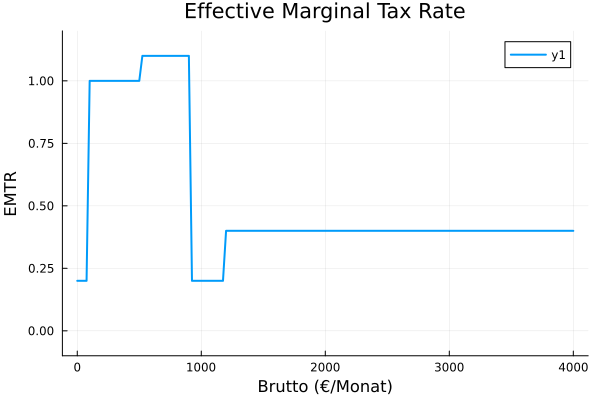

In [21]:
using Plots
ys  = collect(0.0:25.0:4000.0)
net = [net_income(y) for y in ys]
mtr = [emtr(y) for y in ys]

plot(ys, net, xlabel="Brutto (€/Monat)", ylabel="Netto inkl. Transfer",
     title="Nettoeinkommen", lw=2)

plot(ys, mtr, xlabel="Brutto (€/Monat)", ylabel="EMTR",
     title="Effective Marginal Tax Rate", lw=2, ylim=(-0.1,1.2))


**Interpretation:**
The effective marginal tax rate (EMTR) is very high at low income levels,
because social transfers such as Bürgergeld are gradually withdrawn as earnings increase.
Around €1,000, the EMTR drops sharply once the benefit is fully phased out.
This illustrates how the German transfer system can create high disincentives to work at the lower end of the income distribution.


**Policy reflection:**
The €1,000 premium for long-term unemployed workers targets the **extensive margin** of labor supply
(working vs. not working), similar to the **Earned Income Tax Credit (EITC)** in Saez (2002).
It differs from a Mirrlees-style continuous schedule, which focuses on the **intensive margin**
(how many hours to work once employed).
